In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pwd

'C:\\Users\\peter.obi'

In [30]:
df1 = pd.read_csv("dpout_explicitp_trans.csv", header = 0)
df2 = pd.read_csv("final_dpocket_soluble.csv", header = 0)

In [31]:
df1 = df1.drop(columns=df1.columns[:9])
df2= df2.drop(columns=df2.columns[:9])

In [32]:
df1 = df1.drop(columns=df1.columns[-20:])
df2 = df2.drop(columns=df2.columns[-20:])

In [33]:
df1

,lig_vol,pock_vol,nb_AS,nb_AS_norm,mean_as_ray,mean_as_solv_acc,apol_as_prop,apol_as_prop_norm,mean_loc_hyd_dens,mean_loc_hyd_dens_norm,...,as_density_norm,as_max_dst,as_max_dst_norm,drug_score,convex_hull_volume,surf_pol_vdw14,surf_pol_vdw22,surf_apol_vdw14,surf_apol_vdw22,n_abpa
0,683.54,1438.30,80,0,3.98,0.53,0.85,0,30.06,0,...,0,21.00,0,0,811.23,12.97,12.29,94.27,34.40,4
1,353.02,811.40,54,0,3.80,0.47,0.70,0,25.16,0,...,0,16.75,0,0,377.16,20.36,5.22,45.89,22.94,5
2,429.19,833.44,57,0,3.94,0.55,0.72,0,32.10,0,...,0,18.87,0,0,503.65,15.00,6.96,39.85,19.11,3
3,138.83,713.22,32,0,4.29,0.50,0.81,0,23.54,0,...,0,11.42,0,0,124.21,11.79,3.48,123.97,67.29,3
4,421.81,924.04,55,0,4.02,0.53,0.62,0,27.53,0,...,0,16.85,0,0,451.29,32.45,14.08,48.38,19.11,6
5,468.00,786.99,35,0,3.92,0.61,0.86,0,18.60,0,...,0,16.81,0,0,314.05,6.52,0.00,76.08,36.32,2
6,631.61,873.80,33,0,4.02,0.54,0.88,0,16.69,0,...,0,15.14,0,0,343.68,3.21,0.00,56.76,22.94,2
7,362.90,845.61,56,0,4.03,0.48,0.62,0,26.23,0,...,0,13.47,0,0,280.75,35.96,15.90,25.36,1.91,5
8,397.20,1054.77,63,0,3.92,0.58,0.78,0,24.45,0,...,0,21.56,0,0,681.33,10.74,3.48,97.82,59.25,4
9,478.64,741.68,37,0,3.75,0.51,0.41,0,8.40,0,...,0,17.27,0,0,622.42,21.72,12.31,55.79,17.20,6


In [34]:
common_cols = list(set(df1.columns).intersection(df2.columns))

In [35]:
df1[common_cols] = df1[common_cols].apply(pd.to_numeric, errors='coerce')
df2[common_cols] = df2[common_cols].apply(pd.to_numeric, errors='coerce')

In [36]:
df1

,lig_vol,pock_vol,nb_AS,nb_AS_norm,mean_as_ray,mean_as_solv_acc,apol_as_prop,apol_as_prop_norm,mean_loc_hyd_dens,mean_loc_hyd_dens_norm,...,as_density_norm,as_max_dst,as_max_dst_norm,drug_score,convex_hull_volume,surf_pol_vdw14,surf_pol_vdw22,surf_apol_vdw14,surf_apol_vdw22,n_abpa
0,683.54,1438.30,80,0,3.98,0.53,0.85,0,30.06,0,...,0,21.00,0,0,811.23,12.97,12.29,94.27,34.40,4
1,353.02,811.40,54,0,3.80,0.47,0.70,0,25.16,0,...,0,16.75,0,0,377.16,20.36,5.22,45.89,22.94,5
2,429.19,833.44,57,0,3.94,0.55,0.72,0,32.10,0,...,0,18.87,0,0,503.65,15.00,6.96,39.85,19.11,3
3,138.83,713.22,32,0,4.29,0.50,0.81,0,23.54,0,...,0,11.42,0,0,124.21,11.79,3.48,123.97,67.29,3
4,421.81,924.04,55,0,4.02,0.53,0.62,0,27.53,0,...,0,16.85,0,0,451.29,32.45,14.08,48.38,19.11,6
5,468.00,786.99,35,0,3.92,0.61,0.86,0,18.60,0,...,0,16.81,0,0,314.05,6.52,0.00,76.08,36.32,2
6,631.61,873.80,33,0,4.02,0.54,0.88,0,16.69,0,...,0,15.14,0,0,343.68,3.21,0.00,56.76,22.94,2
7,362.90,845.61,56,0,4.03,0.48,0.62,0,26.23,0,...,0,13.47,0,0,280.75,35.96,15.90,25.36,1.91,5
8,397.20,1054.77,63,0,3.92,0.58,0.78,0,24.45,0,...,0,21.56,0,0,681.33,10.74,3.48,97.82,59.25,4
9,478.64,741.68,37,0,3.75,0.51,0.41,0,8.40,0,...,0,17.27,0,0,622.42,21.72,12.31,55.79,17.20,6


In [ ]:
df2

In [37]:
# Define a color map
color_map = sns.color_palette("hls", len(common_cols))

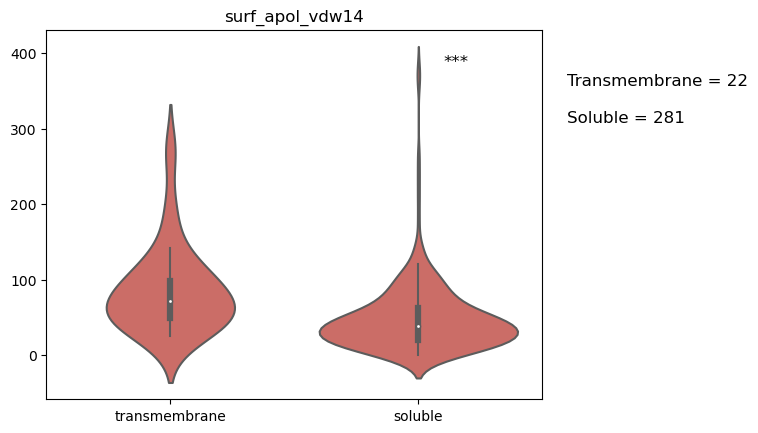

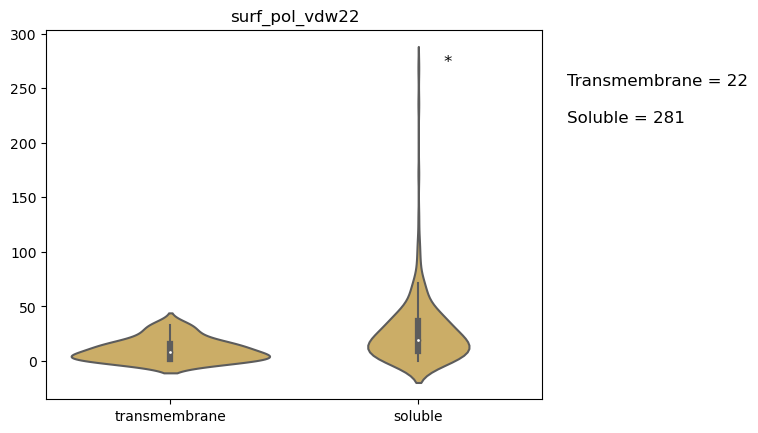

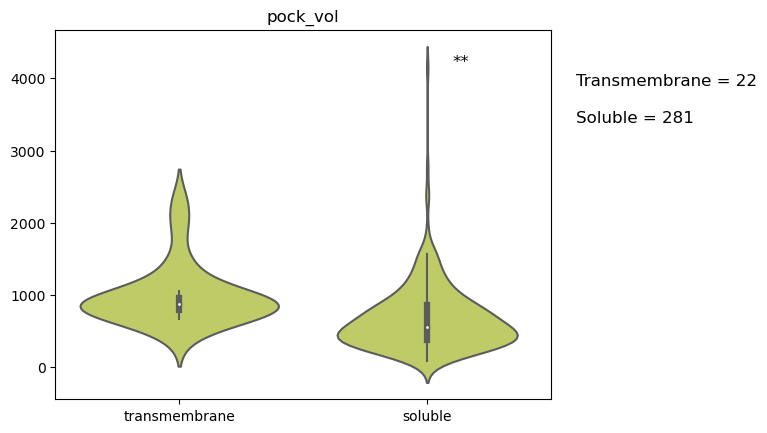

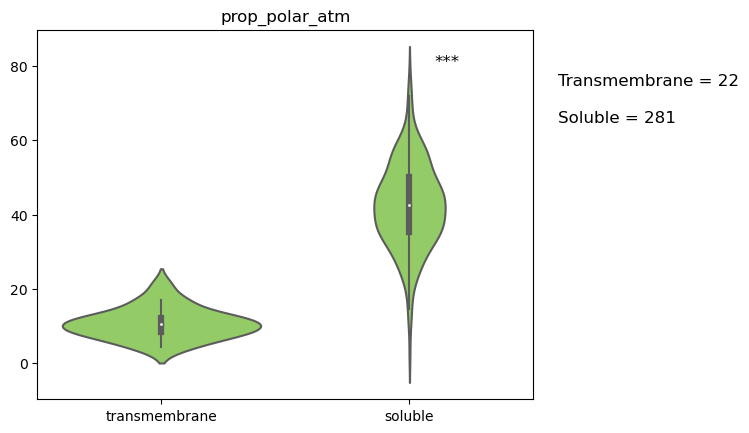

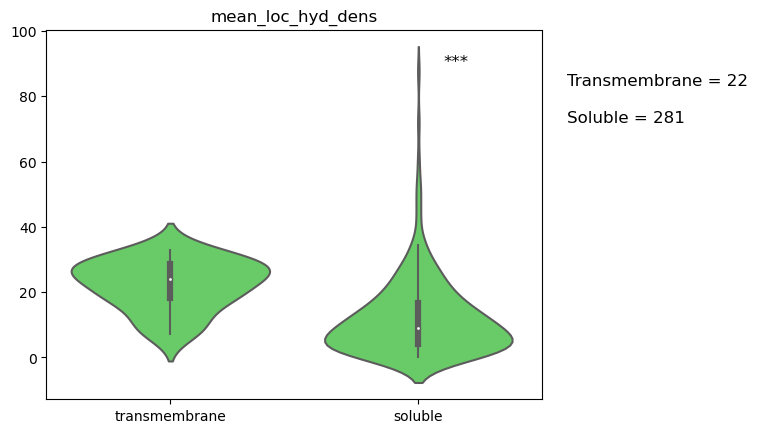

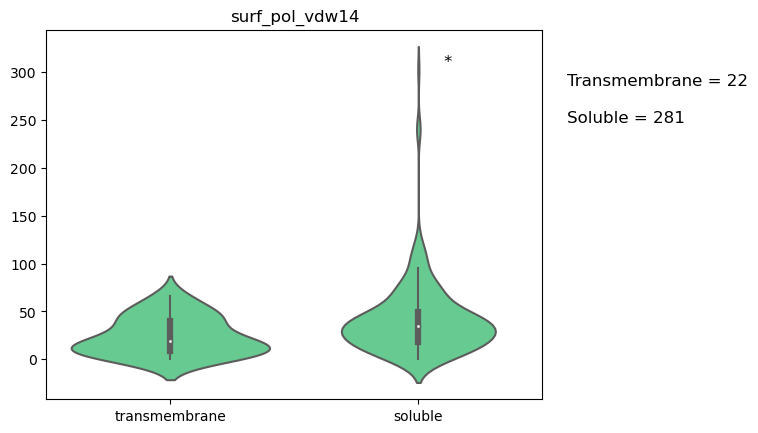

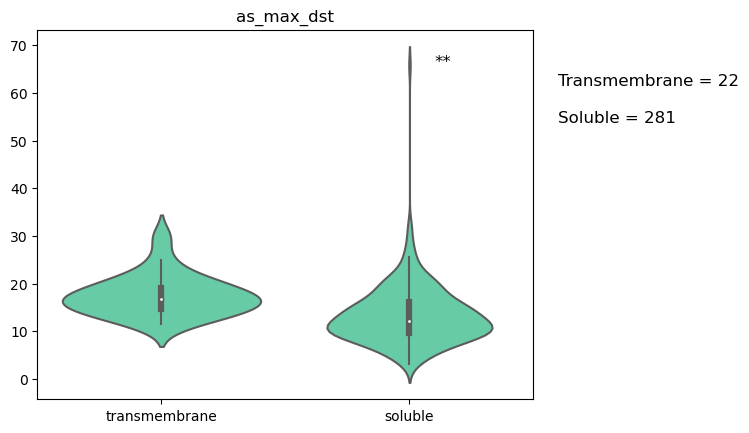

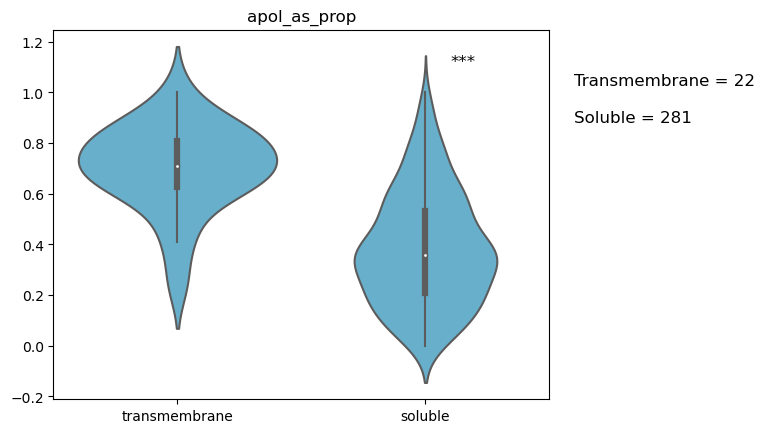

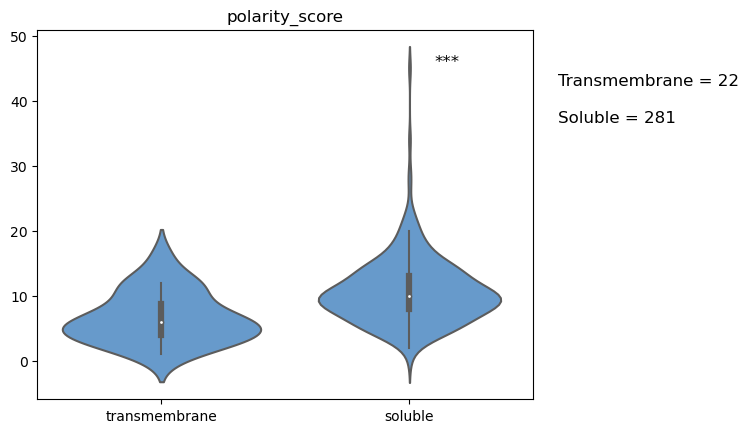

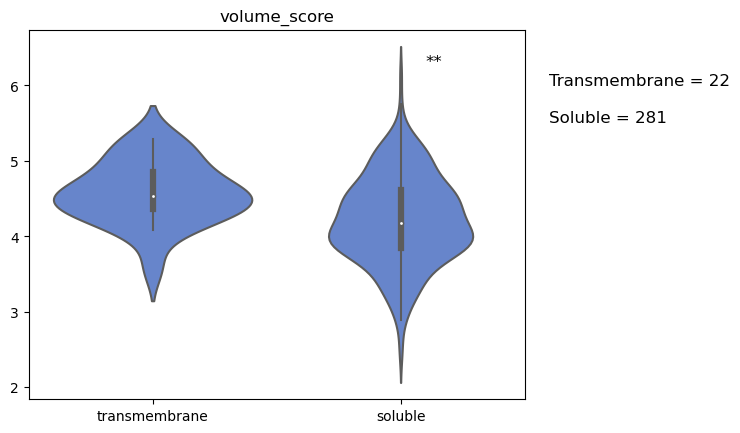

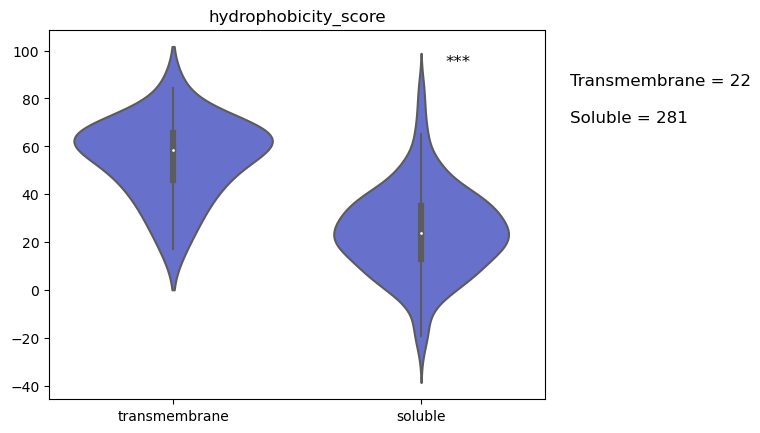

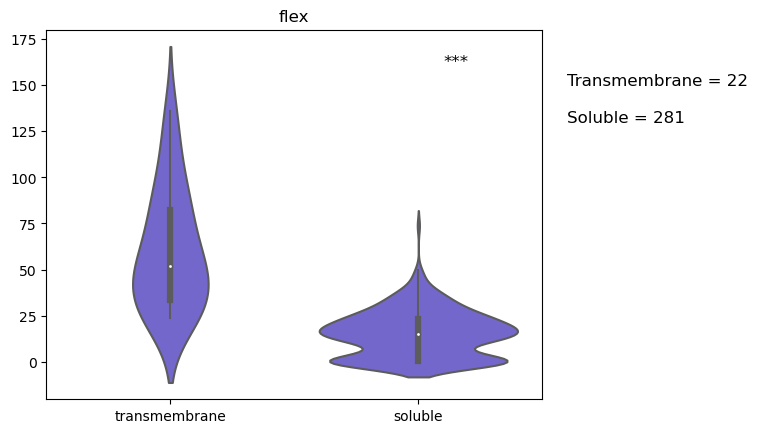

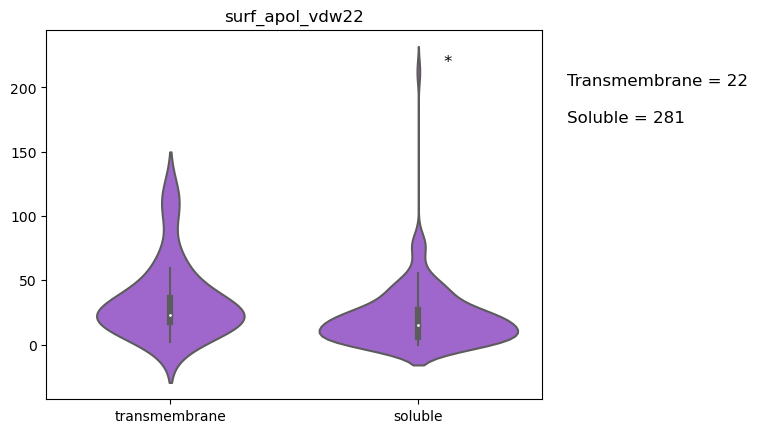

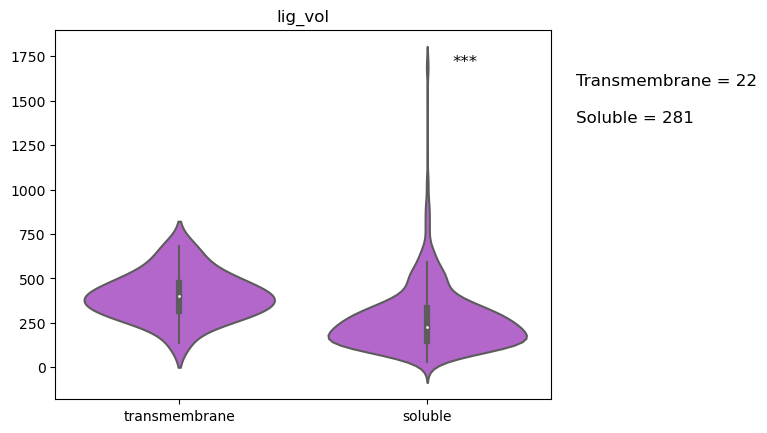

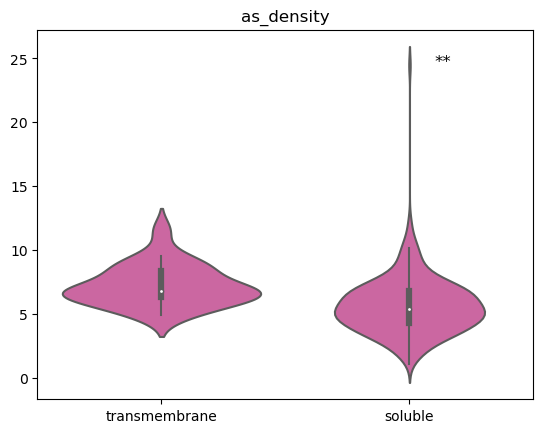

In [45]:
# Loop through the common columns
for i, col in enumerate(common_cols):
  # Skip the column if it contains all 0s
  if (df1[col] == 0).all() or (df2[col] == 0).all():
    continue

  # Get the data for the current column
  data1 = df1[col]
  data2 = df2[col]

  # Run a t-test on the data
  t_statistic, p_value = stats.ttest_ind(data1, data2)

  # Determine the significance level
  if p_value < 0.001:
    sig_level = "***"
  elif p_value < 0.01:
    sig_level = "**"
  elif p_value < 0.05:
    sig_level = "*"
  else:
    continue
    # Get the number of samples in each data set
  n1 = len(data1)
  n2 = len(data2)

# Add the sample size to the plot
  ax.text(1.6, ymax - (ymax - ymin) * 0.15, f"Transmembrane = {n1}", fontsize=12)
  ax.text(1.6, ymax - (ymax - ymin) * 0.25, f"Soluble = {n2}", fontsize=12)


  # Make a box plot for the two columns
  plt.figure()
  ax = sns.violinplot(data=[data1, data2], palette=[color_map[i], color_map[i]])
  #ax = sns.violinplot(data=[data1, data2], palette=[color_map[i], color_map[i]])

  # Add the significance asterisks to the plot
  ymin, ymax = ax.get_ylim()
  ax.text(1.1, ymax - (ymax - ymin) * 0.1, sig_level, fontsize=12)

  # Set the x tick labels to "transmembrane" and "soluble"
  plt.xticks([0, 1], ["transmembrane", "soluble"])

  plt.title(col)

  # Save the plot to a file
  plt.savefig(f"{col}.png")